# Task 1

I have selected the Fashion-MNIST image dataset that I found through [Papers With Code](https://paperswithcode.com/dataset/fashion-mnist). Link:  https://github.com/zalandoresearch/fashion-mnist


In [1]:
!git clone https://github.com/zalandoresearch/fashion-mnist.git

Cloning into 'fashion-mnist'...
remote: Enumerating objects: 762, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 762 (delta 0), reused 2 (delta 0), pack-reused 758 (from 1)
Receiving objects: 100% (762/762), 105.85 MiB | 15.12 MiB/s, done.
Resolving deltas: 100% (444/444), done.


In [2]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import Normalizer
import warnings
warnings.filterwarnings("ignore")

In [3]:
import sys
sys.path.append("/content/fashion-mnist")

In [4]:
from utils import mnist_reader
x_train, y_train = mnist_reader.load_mnist('fashion-mnist/data/fashion', kind='train')
x_test, y_test = mnist_reader.load_mnist('fashion-mnist/data/fashion', kind='t10k')
x_train, x_test = x_train / 255.0, x_test / 255.0   # normalize pixels

In [6]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

## Part 1

The data from this repository has already been cleaned and prepared for machine learning applications. I start with data visualization. I decided to use UMAP as the image dataset has a lot of dimensions.

Resource: https://github.com/lmcinnes/umap

In [ ]:
import umap
reducer = umap.UMAP(n_components=2, random_state=42, n_neighbors=5, min_dist=0.1)
embedding = reducer.fit_transform(x_train)

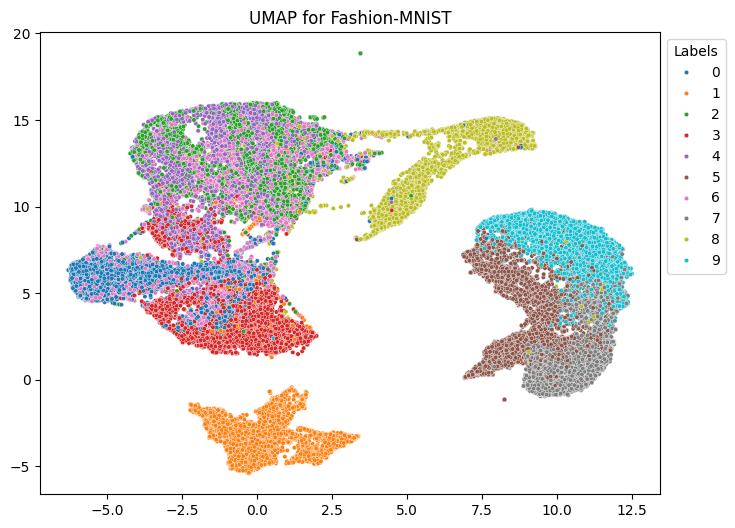

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=y_train, palette="tab10", s=10)
plt.title("UMAP for Fashion-MNIST")
plt.legend(title="Labels", bbox_to_anchor=(1, 1))
plt.show()

In [ ]:
# added more informative labels

label_map = {
    0: "0 T-shirt/top",
    1: "1 Trouser",
    2: "2 Pullover",
    3: "3 Dress",
    4: "4 Coat",
    5: "5 Sandal",
    6: "6 Shirt",
    7: "7 Sneaker",
    8: "8 Bag",
    9: "9 Ankle boot"
}
mapped_labels = [label_map[label] for label in y_train]

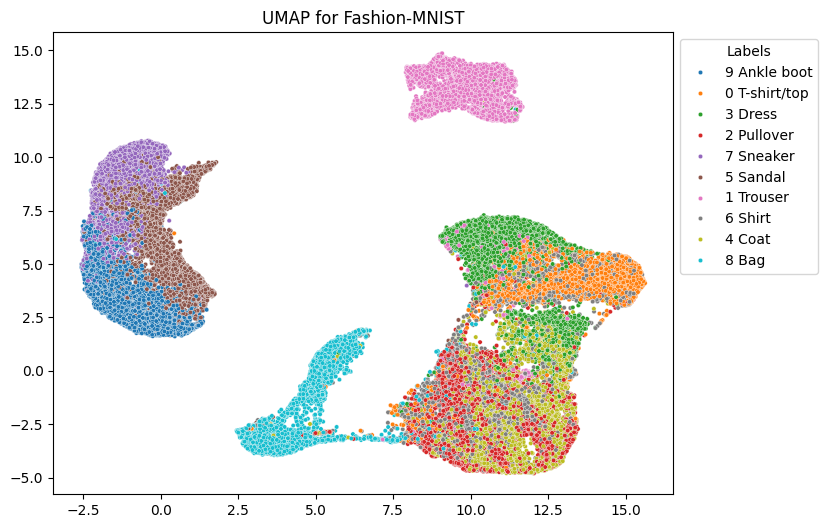

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=mapped_labels, palette="tab10", s=10)
plt.title("UMAP for Fashion-MNIST")
plt.legend(title="Labels", bbox_to_anchor=(1, 1))
plt.show()

From the graph, we can see that similarly shaped items group together quite well. For example sneakers, ankle boots, and sandals overlap slightly in one cluster, while trousers are separate from all the other garments due to their relatively unique bifurcated shape.

### Two Convolution layers test

In [16]:
# https://machinelearningmastery.com/padding-and-stride-for-convolutional-neural-networks/
# https://makeschool.org/mediabook/oa/tutorials/keras-for-image-classification-pfw/building-a-keras-sequential-model/

x_train2 = x_train.reshape(-1, 28, 28, 1)
x_test2 = x_test.reshape(-1, 28, 28, 1)

model = keras.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [25]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train2, y_train, epochs=10, batch_size=50, validation_split=0.2)

Epoch 1/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 78s 77ms/step - accuracy: 0.7709 - loss: 0.6412 - val_accuracy: 0.8808 - val_loss: 0.3360
Epoch 2/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 83s 78ms/step - accuracy: 0.8918 - loss: 0.3059 - val_accuracy: 0.9034 - val_loss: 0.2671
Epoch 3/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 86s 83ms/step - accuracy: 0.9133 - loss: 0.2409 - val_accuracy: 0.9011 - val_loss: 0.2738
Epoch 4/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 66s 66ms/step - accuracy: 0.9247 - loss: 0.2069 - val_accuracy: 0.9111 - val_loss: 0.2460
Epoch 5/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 66s 49ms/step - accuracy: 0.9358 - loss: 0.1738 - val_accuracy: 0.9103 - val_loss: 0.2550
Epoch 6/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 46s 48ms/step - accuracy: 0.9429 - loss: 0.1540 - val_accuracy: 0.9169 - val_loss: 0.2426
Epoch 7/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 83s 50ms/step - accuracy: 0.9516 - loss: 0.1306 - val_accuracy: 0.9143 - val_loss: 0.2482
Epoch 8/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 82s 50ms/step - accuracy: 0.9601 - loss: 0.1084 - 

### Three Convolution layers test

In [27]:
loss, acc = model.evaluate(x_test2, y_test)
print("Loss: ", loss)
print("Accuracy: ", acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.9087 - loss: 0.3370
Loss:  0.3099854588508606
Accuracy:  0.9126999974250793


In [28]:
model = keras.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train2, y_train, epochs=10, batch_size=50, validation_split=0.2)

Epoch 1/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 51s 51ms/step - accuracy: 0.7320 - loss: 0.7324 - val_accuracy: 0.8712 - val_loss: 0.3593
Epoch 2/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 69s 72ms/step - accuracy: 0.8781 - loss: 0.3407 - val_accuracy: 0.8896 - val_loss: 0.3013
Epoch 3/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 62s 51ms/step - accuracy: 0.8961 - loss: 0.2817 - val_accuracy: 0.8978 - val_loss: 0.2769
Epoch 4/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 81s 50ms/step - accuracy: 0.9074 - loss: 0.2499 - val_accuracy: 0.9071 - val_loss: 0.2523
Epoch 5/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 48s 50ms/step - accuracy: 0.9202 - loss: 0.2129 - val_accuracy: 0.9069 - val_loss: 0.2546
Epoch 6/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 49s 51ms/step - accuracy: 0.9270 - loss: 0.1966 - val_accuracy: 0.9064 - val_loss: 0.2520
Epoch 7/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 105s 75ms/step - accuracy: 0.9369 - loss: 0.1721 - val_accuracy: 0.9130 - val_loss: 0.2445
Epoch 8/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 59s 51ms/step - accuracy: 0.9445 - loss: 0.1525 -

In [31]:
loss, acc = model.evaluate(x_test2, y_test)
print("Loss: ", loss)
print("Accuracy: ", acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9049 - loss: 0.3026
Loss:  0.2878768742084503
Accuracy:  0.9068999886512756


I based my model design off of the Image Recognition tutorial in the Make Schoool resource I linked above. I decided to use two Convolutional layers, one MaxPooling layer between them, and two Dense layers at the end to flatten and convert the vector into the actual classifier. The reason I used two Convolutional layers, rather than three was because I tested both versions of the model and the accuracy was not improved by adding the extra layers, although it had less los. The model with two Conv layers and one MaxPooling layer had an accuracy of $91.27\%$ and a loss of $0.310$, but with three Conv layers and two MaxPooling layers had an accuracy of $90.69\%$ and loss of $0.288$. I am using ReLU as the activation function because it computes faster than the sigmoid function, does not fall victim to the vanishing gradient problem, and has been shown to better encode complex patterns in CNN applications. The compiler is using the Adam optimizer to help the network converge faster by adapting the learning rate. I am using the Sparse Categorical Corssentropy loss because this dataset has multiple output categories and this returns the best matching category as its result. The dataset came with 60,000 train samples, and 10,000 test samples. I used 20% of the test data for validation.

## Part 2

I will now be using the VGG16 model for this same dataset. This requires some reprocessing of the dataset as the input is black and white and VGG16 expects RGB color images.

In [5]:
from keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.applications.vgg16 import preprocess_input

x_train_vgg = x_train.reshape(-1, 28, 28, 1)
x_train_vgg=np.dstack([x_train_vgg] * 3)
x_train_vgg = x_train_vgg.reshape(-1, 28,28,3)
x_train_vgg = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in x_train_vgg])
x_train_vgg = preprocess_input(x_train_vgg)
print(x_train_vgg.shape)

x_test_vgg = x_test.reshape(-1, 28, 28, 1)
x_test_vgg=np.dstack([x_test_vgg] * 3)
x_test_vgg = x_test_vgg.reshape(-1, 28,28,3)
x_test_vgg = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in x_test_vgg])
x_test_vgg = preprocess_input(x_test_vgg)
print(x_test_vgg.shape)

(60000, 48, 48, 3)
(10000, 48, 48, 3)


In [7]:
from tensorflow.keras.utils import to_categorical

y_train_vgg=to_categorical(y_train)
y_test_vgg=to_categorical(y_test)
print(y_train_vgg.shape)
print(y_test_vgg.shape)

(60000, 10)
(10000, 10)


In [18]:

y_train_vgg=to_categorical(y_train)
print(y_train_vgg.shape)


(60000, 10)


In [10]:
# https://towardsdatascience.com/transfer-learning-with-vgg16-and-keras-50ea161580b4/
# https://www.kaggle.com/code/viratkothari/image-classification-of-mnist-using-vgg16

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

## Loading VGG16 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=x_train_vgg[0].shape)
base_model.trainable = False

model_vgg = keras.Sequential()
model_vgg.add(base_model)
model_vgg.add(Flatten())
model_vgg.add(Dense(50, activation='relu'))
model_vgg.add(Dense(20, activation='relu'))
model_vgg.add(Dense(10, activation='softmax'))

model_vgg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [35]:
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [27]:
model_vgg.fit(x_train_vgg, y_train_vgg, epochs=5, batch_size=100, validation_split=0.2)

Epoch 1/5
480/480 ━━━━━━━━━━━━━━━━━━━━ 1684s 4s/step - accuracy: 0.1125 - loss: 2.3055 - val_accuracy: 0.1358 - val_loss: 2.3149
Epoch 2/5
480/480 ━━━━━━━━━━━━━━━━━━━━ 1692s 3s/step - accuracy: 0.1260 - loss: 2.2887 - val_accuracy: 0.1493 - val_loss: 2.2797
Epoch 3/5
480/480 ━━━━━━━━━━━━━━━━━━━━ 1627s 3s/step - accuracy: 0.1406 - loss: 2.2681 - val_accuracy: 0.1867 - val_loss: 2.2689
Epoch 4/5
480/480 ━━━━━━━━━━━━━━━━━━━━ 1656s 3s/step - accuracy: 0.1471 - loss: 2.2502 - val_accuracy: 0.1872 - val_loss: 2.2218
Epoch 5/5
480/480 ━━━━━━━━━━━━━━━━━━━━ 1639s 3s/step - accuracy: 0.1568 - loss: 2.2290 - val_accuracy: 0.1607 - val_loss: 2.1965


In [31]:
loss_vgg, acc_vgg = model_vgg.evaluate(x_test_vgg, y_test_vgg)
print("Loss: ", loss_vgg)
print("Accuracy: ", acc_vgg)

313/313 ━━━━━━━━━━━━━━━━━━━━ 420s 1s/step - accuracy: 0.1664 - loss: 2.1983
Loss:  2.200899839401245
Accuracy:  0.16179999709129333


The VGG16 model has much higher complexity, and so did take a lot longer to train than the more simple model. The VGG16 model has 16 layers, of which 13 are Convolutional and 3 are fully connected layers. The original model I used had an accuracy of $91.27\%$ and a loss of $0.310$, but the VGG16 based model had an accuracy of $\%$ and a loss of $\%%. This much lower result is likely because the weights of the VGG model are configured to work well for a large variety of color images and are not modify enough during the transfer learning phase to work for this three layer greyscale with black background dataset.

## Part 3

In [24]:
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

from tensorflow.keras.preprocessing.image import ImageDataGenerator

x_train_img = x_train.reshape(-1, 28, 28, 1)
x_test_img = x_test.reshape(-1, 28, 28, 1)

datagen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.1, fill_mode='nearest', validation_split=0.2)
datagen.fit(x_train_img)

In [18]:
x_train_img.shape

(60000, 28, 28, 1)

In [25]:
model_img = keras.Sequential()
model_img.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_img.add(MaxPooling2D((2, 2)))
model_img.add(Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_img.add(MaxPooling2D((2, 2)))
model_img.add(Conv2D(128, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_img.add(Flatten())
model_img.add(Dense(128, activation='relu'))
model_img.add(Dense(10, activation='softmax'))

model_img.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_img.fit(datagen.flow(x_train_img, y_train, batch_size=50), epochs=10)

Epoch 1/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 118s 96ms/step - accuracy: 0.6722 - loss: 0.8742
Epoch 2/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 109s 69ms/step - accuracy: 0.8114 - loss: 0.4981
Epoch 3/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 81s 67ms/step - accuracy: 0.8437 - loss: 0.4139
Epoch 4/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 82s 68ms/step - accuracy: 0.8556 - loss: 0.3794
Epoch 5/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 80s 67ms/step - accuracy: 0.8678 - loss: 0.3507
Epoch 6/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 80s 66ms/step - accuracy: 0.8750 - loss: 0.3305
Epoch 7/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 80s 66ms/step - accuracy: 0.8788 - loss: 0.3211
Epoch 8/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 80s 67ms/step - accuracy: 0.8813 - loss: 0.3158
Epoch 9/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 80s 66ms/step - accuracy: 0.8851 - loss: 0.3070
Epoch 10/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 80s 66ms/step - accuracy: 0.8887 - loss: 0.2943


In [26]:
loss, acc = model_img.evaluate(x_test_img, y_test)
print("Loss: ", loss)
print("Accuracy: ", acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.8998 - loss: 0.2750
Loss:  0.2672417461872101
Accuracy:  0.9016000032424927


I used the ImageDataGenerator from TensorFlow to add random transformations to the dataset. The transformations I applied was up to 10% of rotation, zoom, and width and height shift. The goal of data augmentation is to build more randomness and variability into the dataset so that the model learns in a way that is more generalizeable. Originally the model had an accuracy of $91.27\%$ and a loss of $0.310$, but with the augmented data the accuracy was $90.16\%$ and the loss was $0.267\%$. The new model did not succeed in having higher accuracy, but did have lower loss which is good. The second version did have a more varied dataset so slightly lower accuracy makes sense. It took both models about the same amount of time to run, so for a real world model where there will be a lot more variance, using data augmentation makes a lot of sense.